In [6]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
import seaborn as sns
colors = sns.color_palette()

import pandapower as pp
import pandapower.networks as pn
from pandapower.networks import case300
from pandapower.plotting import simple_plot, draw_collections
from pandapower.plotting import create_bus_collection
from pandapower.plotting import create_line_collection
from pandapower.plotting import create_trafo_collection

In [2]:
net = pn.case300()
buses = np.arange(1, 301)

c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, 

In [11]:
Case300_Data = pd.read_csv('case300_data.csv')
# Zone Identification
Zone1 = Case300_Data[Case300_Data['Zone'] == 1]
Zone2 = Case300_Data[Case300_Data['Zone'] == 2]
Zone3 = Case300_Data[Case300_Data['Zone'] == 3]
Zone4 = Case300_Data[Case300_Data['Zone'] == 4]

print(Zone1)

     Unnamed: 0  name  vn_kv type  zone  in_service  max_vm_pu  min_vm_pu  \
56           56    69  115.0    b     1        True       1.06       0.94   
66           66    80  115.0    b     1        True       1.06       0.94   
167         167   189   66.0    b     1        True       1.06       0.94   
168         168   190  345.0    b     1        True       1.06       0.94   
169         169   191  230.0    b     1        True       1.06       0.94   
170         170   192  230.0    b     1        True       1.06       0.94   
171         171   193   66.0    b     1        True       1.06       0.94   
173         173   195  345.0    b     1        True       1.06       0.94   
174         174   196  115.0    b     1        True       1.06       0.94   
175         175   197  115.0    b     1        True       1.06       0.94   
176         176   198  115.0    b     1        True       1.06       0.94   
177         177   199  115.0    b     1        True       1.06       0.94   

The number of given colors (1) is smaller than the number of nodes (65) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (79) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (67) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (89) to draw! The colors will be repeated to fit.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.


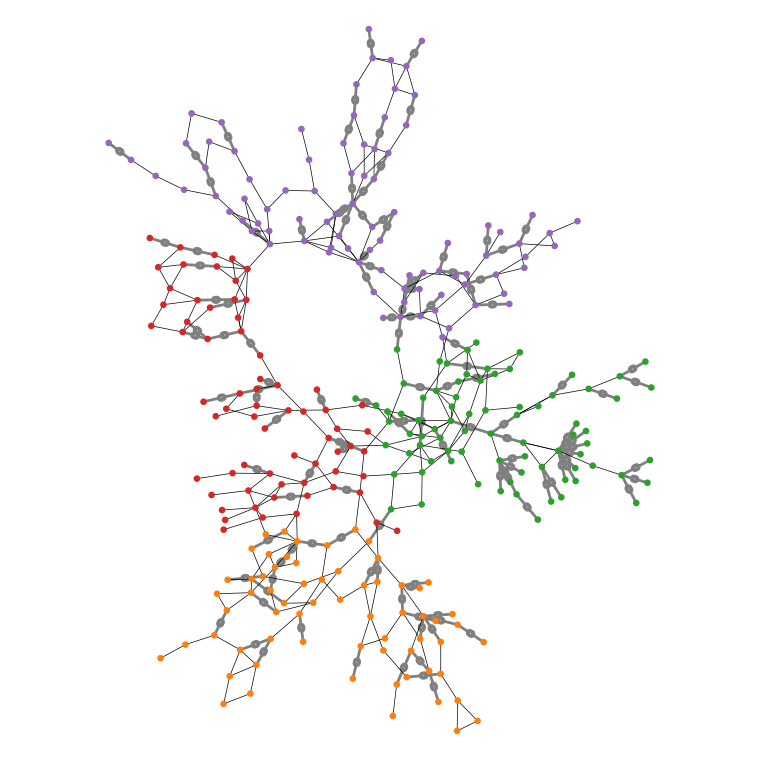

In [9]:
# Create bus collections
####### The bus no. is not monotonically increasing when plot buses, so Boolean index cannot be applied ###########
zone1_bc = create_bus_collection(net, buses=Zone1.iloc[:,0], color=colors[1], size=0.1)
zone2_bc = create_bus_collection(net, buses=Zone2.iloc[:,0], color=colors[2], size=0.1)
zone3_bc = create_bus_collection(net, buses=Zone3.iloc[:,0], color=colors[3], size=0.1)
zone4_bc = create_bus_collection(net, buses=Zone4.iloc[:,0], color=colors[4], size=0.1)

# Create line collection
lc = create_line_collection(net, color='black', linewidth=0.5, zorder=-100)

# Create trafo collection
tc = create_trafo_collection(net, color='gray', size=0.1, zorder=-200)

zone_list = [zone1_bc, zone2_bc, zone3_bc, zone4_bc, lc, tc]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
draw_collections(zone_list, ax=ax)

plt.tight_layout()
plt.show()
plt.close('all')

In [ ]:
## IN THE FUTURE USE NET.BUS.GEODATA AGGGHH ##